In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
file_one = "Resources/DataOne.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pharmaceutical_merged_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on=["Mouse ID", "Mouse ID"]).sort_values(by='Timepoint')

# Display the data table for preview
pharmaceutical_merged_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.0,0
243,z795,Naftisol,0,45.0,0
641,f966,Capomulin,0,45.0,0
1326,m331,Zoniferol,0,45.0,0
646,u364,Capomulin,0,45.0,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_drug_and_timepoint = pharmaceutical_merged_df.groupby(['Drug', 'Timepoint'])
grp_tumor_volume = grp_drug_and_timepoint["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
grp_drug_and_timepoint_df = pd.DataFrame({"Tumor Volume (mm3) (average)":grp_tumor_volume})

# Preview DataFrame
grp_drug_and_timepoint_df.head()

Tumor Volume (mm3) (average)
Drug      Timepoint                              
Capomulin 0                             45.000000
          5                             44.266086
          10                            43.084291
          15                            42.064317
          20                            40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grp_drug_and_timepoint_sem = grp_drug_and_timepoint.sem()
grp_drug_and_timepoint_sem.reset_index(inplace = True)

# Convert to DataFrame
grp_drug_and_timepoint_sem_df = pd.DataFrame(grp_drug_and_timepoint_sem)

# Preview DataFrame
grp_drug_and_timepoint_sem_dfdropped = grp_drug_and_timepoint_sem_df.drop(columns="Mouse ID")
grp_drug_and_timepoint_sem_dfdropped = grp_drug_and_timepoint_sem_dfdropped.drop(columns="Metastatic Sites")
grp_drug_and_timepoint_sem_dfdropped.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grp_drug_and_timepoint = pharmaceutical_merged_df.groupby(['Drug', 'Timepoint'])
grp_drug_and_timepoint_mean = grp_drug_and_timepoint.mean()
grp_drug_and_timepoint_mean.reset_index(inplace = True)

# Convert to DataFrame
grp_drug_and_timepoint_df = pd.DataFrame(grp_drug_and_timepoint_mean)
grp_drug_and_timepoint_df = grp_drug_and_timepoint_df.drop(columns = "Metastatic Sites")

# Preview DataFrame
grp_drug_and_timepoint_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Minor Data Munging to Re-Format the Data Frames
grp_drug_and_timepoint_df = grp_drug_and_timepoint_df.pivot("Timepoint","Drug","Tumor Volume (mm3)")
tumor_vol_by_drug = grp_drug_and_timepoint_df
# Preview that Reformatting worked
grp_drug_and_timepoint_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
#drop unused drugs
drop = grp_drug_and_timepoint_df.drop(columns="Zoniferol")
drop = drop.drop(columns="Stelasyn")
drop = drop.drop(columns="Ramicane")
drop = drop.drop(columns="Propriva")
drop = drop.drop(columns="Naftisol")
drop = drop.drop(columns="Ceftamin")
grp_drug_and_timepoint_df = drop
grp_drug_and_timepoint_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


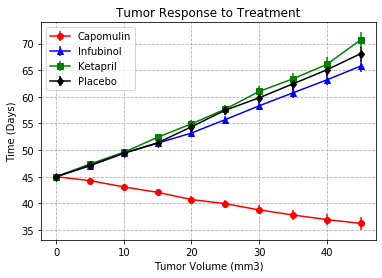

In [7]:
sem_pivot_df = grp_drug_and_timepoint_sem_dfdropped.pivot("Timepoint","Drug","Tumor Volume (mm3)")
# Generate the Plot (with Error Bars)

#Graph and Axis Titles
plt.grid(linestyle='--')
plt.title("Tumor Response to Treatment")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Time (Days)")


y1 = grp_drug_and_timepoint_df["Capomulin"]
y2 = grp_drug_and_timepoint_df["Infubinol"]
y3 = grp_drug_and_timepoint_df["Ketapril"]
y4 = grp_drug_and_timepoint_df["Placebo"]
x = np.arange(0,50,5)

a1 = (sem_pivot_df["Capomulin"][45])/10
b1 = sem_pivot_df["Capomulin"][45]
yerr1 = np.linspace(a1, b1, 10)
a2 = sem_pivot_df["Infubinol"][45]/10
b2 = sem_pivot_df["Infubinol"][45]
yerr2 = np.linspace(a2, b2, 10)
a3 = sem_pivot_df["Ketapril"][45]/10
b3 = sem_pivot_df["Ketapril"][45]
yerr3 = np.linspace(a3, b3, 10)
a4 = sem_pivot_df["Placebo"][45]/10
b4 = sem_pivot_df["Placebo"][45]
yerr4 = np.linspace(a4, b4, 10)


plt.errorbar(x, y1, yerr=yerr1, marker='o', color='red', label="Capomulin")
plt.errorbar(x, y2, yerr=yerr2, marker='^', color='blue', label="Infubinol")
plt.errorbar(x, y3, yerr=yerr3, marker='s', color='green', label="Ketapril")
plt.errorbar(x, y4, yerr=yerr4, marker='d', color='black', label="Placebo")
plt.legend()

# Save the Figure
plt.show()

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grp_drug_and_timepoint_met = pharmaceutical_merged_df.groupby(['Drug', 'Timepoint'])
grp_met_sites = grp_drug_and_timepoint_met["Metastatic Sites"].mean()

# Convert to DataFrame
grp_drug_and_timepoint_met_df = pd.DataFrame({"Metastatic Sites (average)":grp_met_sites})

# Preview DataFrame
grp_drug_and_timepoint_met_df.head()

Metastatic Sites (average)
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                            0.160000
          10                           0.320000
          15                           0.375000
          20                           0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grp_drug_and_timepoint_met = pharmaceutical_merged_df.groupby(['Drug', 'Timepoint'])
grp_met_sites_sem = grp_drug_and_timepoint_met["Metastatic Sites"].sem()

# Convert to DataFrame
grp_drug_and_timepoint_met_sem_df = pd.DataFrame({"Metastatic Sites (average)":grp_met_sites_sem})

# Preview DataFrame
grp_drug_and_timepoint_met_sem_df.head()

Metastatic Sites (average)
Drug      Timepoint                            
Capomulin 0                            0.000000
          5                            0.074833
          10                           0.125433
          15                           0.132048
          20                           0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
grp_drug_and_timepoint_met_df.reset_index(inplace = True)
grp_drug_and_timepoint_met_df = grp_drug_and_timepoint_met_df.pivot("Timepoint","Drug","Metastatic Sites (average)")
# Preview that Reformatting worked
grp_drug_and_timepoint_met_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


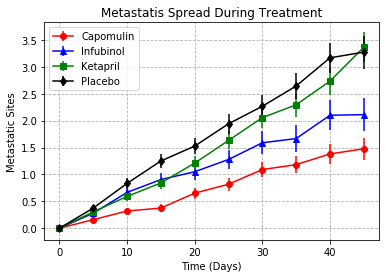

In [12]:
grp_drug_and_timepoint_met_sem_df.reset_index(inplace = True)
met_sem_pivot_df = grp_drug_and_timepoint_met_sem_df.pivot("Timepoint","Drug","Metastatic Sites (average)")
# Generate the Plot (with Error Bars)
plt.grid(linestyle='--')
plt.title("Metastatis Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")


y1 = grp_drug_and_timepoint_met_df["Capomulin"]
y2 = grp_drug_and_timepoint_met_df["Infubinol"]
y3 = grp_drug_and_timepoint_met_df["Ketapril"]
y4 = grp_drug_and_timepoint_met_df["Placebo"]
x = np.arange(0,50,5)

a1 = (met_sem_pivot_df["Capomulin"][45])/10
b1 = met_sem_pivot_df["Capomulin"][45]
yerr1 = np.linspace(a1, b1, 10)
a2 = met_sem_pivot_df["Infubinol"][45]/10
b2 = met_sem_pivot_df["Infubinol"][45]
yerr2 = np.linspace(a2, b2, 10)
a3 = met_sem_pivot_df["Ketapril"][45]/10
b3 = met_sem_pivot_df["Ketapril"][45]
yerr3 = np.linspace(a3, b3, 10)
a4 = met_sem_pivot_df["Placebo"][45]/10
b4 = met_sem_pivot_df["Placebo"][45]
yerr4 = np.linspace(a4, b4, 10)

plt.errorbar(x, y1, yerr=yerr1, marker='o', color='red', label="Capomulin")
plt.errorbar(x, y2, yerr=yerr2, marker='^', color='blue', label="Infubinol")
plt.errorbar(x, y3, yerr=yerr3, marker='s', color='green', label="Ketapril")
plt.errorbar(x, y4, yerr=yerr4, marker='d', color='black', label="Placebo")
plt.legend()

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = grp_drug_and_timepoint.count()

# Convert to DataFrame
drop = survival_rate.drop(columns="Metastatic Sites")
survival_rate_df = drop.drop(columns="Tumor Volume (mm3)")
survival_rate_df.reset_index(inplace = True)

# Preview DataFrame
survival_rate_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_pivot_df = survival_rate_df.pivot("Timepoint","Drug","Mouse ID")
# Preview the Data Frame
survival_rate_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


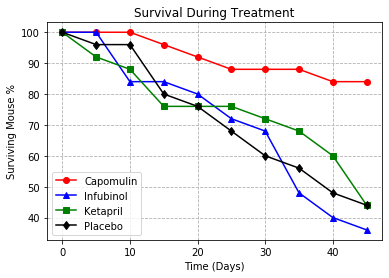

In [15]:
# Generate the Plot (Accounting for percentages)
plt.grid(linestyle='--')
plt.title("Survival During Treatment")
plt.ylabel("Surviving Mouse %")
plt.xlabel("Time (Days)")


y1 = (survival_rate_pivot_df["Capomulin"]/survival_rate_pivot_df["Capomulin"][0])*100
y2 = (survival_rate_pivot_df["Infubinol"]/survival_rate_pivot_df["Infubinol"][0])*100
y3 = (survival_rate_pivot_df["Ketapril"]/survival_rate_pivot_df["Ketapril"][0])*100
y4 = (survival_rate_pivot_df["Placebo"]/survival_rate_pivot_df["Placebo"][0])*100
x = np.arange(0,50,5)

plt.errorbar(x, y1, marker='o', color='red', label="Capomulin")
plt.errorbar(x, y2, marker='^', color='blue', label="Infubinol")
plt.errorbar(x, y3, marker='s', color='green', label="Ketapril")
plt.errorbar(x, y4, marker='d', color='black', label="Placebo")
plt.legend()

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
capomulin_prcnt = ((tumor_vol_by_drug["Capomulin"][45]/tumor_vol_by_drug["Capomulin"][0])*100)-100
ceftamin_prcnt = ((tumor_vol_by_drug["Ceftamin"][45]/tumor_vol_by_drug["Ceftamin"][0])*100)-100
infubinol_prcnt = ((tumor_vol_by_drug["Infubinol"][45]/tumor_vol_by_drug["Infubinol"][0])*100)-100
ketapril_prcnt = ((tumor_vol_by_drug["Ketapril"][45]/tumor_vol_by_drug["Ketapril"][0])*100)-100
naftisol_prcnt = ((tumor_vol_by_drug["Naftisol"][45]/tumor_vol_by_drug["Naftisol"][0])*100)-100
placebo_prcnt = ((tumor_vol_by_drug["Placebo"][45]/tumor_vol_by_drug["Placebo"][0])*100)-100
propriva_prcnt = ((tumor_vol_by_drug["Propriva"][45]/tumor_vol_by_drug["Propriva"][0])*100)-100
ramicane_prcnt = ((tumor_vol_by_drug["Ramicane"][45]/tumor_vol_by_drug["Ramicane"][0])*100)-100
stelasyn_prcnt = ((tumor_vol_by_drug["Stelasyn"][45]/tumor_vol_by_drug["Stelasyn"][0])*100)-100
zoniferol_prcnt = ((tumor_vol_by_drug["Zoniferol"][45]/tumor_vol_by_drug["Zoniferol"][0])*100)-100

# Display the data to confirm
print(f'{capomulin_prcnt}%')
print(f'{ceftamin_prcnt}%')
print(f'{infubinol_prcnt}%')
print(f'{ketapril_prcnt}%')
print(f'{naftisol_prcnt}%')
print(f'{placebo_prcnt}%')
print(f'{propriva_prcnt}%')
print(f'{ramicane_prcnt}%')
print(f'{stelasyn_prcnt}%')
print(f'{zoniferol_prcnt}%')


-19.475302667894155%
42.516491855897414%
46.123471727851836%
57.02879468660606%
53.9233471347693%
51.29796048315151%
47.24117486320634%
-22.32090046276666%
52.085134287898995%
46.579750865095235%


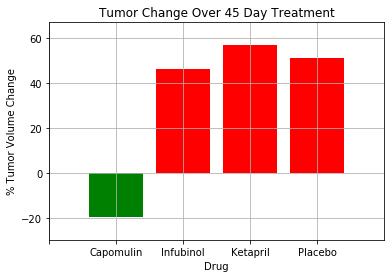

In [18]:
# Store all Relevant Percent Changes into a Tuple
y_axis = [0, capomulin_prcnt, infubinol_prcnt, ketapril_prcnt, placebo_prcnt]

# Splice the data between passing and failing drugs
passfail = []
for y in y_axis:
     if y > 0: 
         passfail.append("r")
     else:
         passfail.append("g")

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(y_axis))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [" ", "Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.xlim(0, len(x_axis))
plt.ylim(min(y_axis)-10, max(y_axis)+10)
plt.grid(linestyle='-')
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
bargraph = plt.bar(x_axis, y_axis, color=passfail, alpha=1, align="center")

# Use functions to label the percentages of changes
# Call functions to implement the function calls


# Save the Figure
bargraph

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)

## Observables
1. Capomulin and Ramicane are the only Drugs in the study that seem to prove effective in combatting cancer. They both produce coincide with a reduction in tumor size and an increase the survivability of the subject.
2. Ketapril, Naftisol, and Stelasyn produced higher mortality and larger-sized tumors than the placebo group, suggesting that they may, in fact, exascerbate cancer. These results, however, do seem to fall within the error margins of all of the aforementioned groups. As such, the correlation is not evident as is the correlation between Capomulin/Ramicane and survivability.
3. The most effective anti-cancer drugs, Capomulin and Ramicane, do not reduce the size of sumors even half as fast as the growth rate corresponding to those drugs that are either ineffective or actively harmful. Neither do they show as marked a reduction in metastatic sites as they do a reduction in tumor size. This may suggest that, while the drugs do improve survivability, their success rate is still not reliable.